## Global Shark Attacks

In [1]:
import pandas as pd
import numpy as np
import csv
import pylab as plt
import seaborn as sns
import regex as re
%matplotlib inline

In [2]:
URL= r'C:\Users\carol\Ironhack\Proyecto-1\data\attacks.csv'

In [3]:
ataques_original=pd.read_csv(URL, encoding='latin1')

In [4]:
ataques= ataques_original.copy()
ataques.head().T

,0,1,2,3,4
Case Number,2018.06.25,2018.06.18,2018.06.09,2018.06.08,2018.06.04
Date,25-Jun-2018,18-Jun-2018,09-Jun-2018,08-Jun-2018,04-Jun-2018
Year,2018.0,2018.0,2018.0,2018.0,2018.0
Type,Boating,Unprovoked,Invalid,Unprovoked,Provoked
Country,USA,USA,USA,AUSTRALIA,MEXICO
Area,California,Georgia,Hawaii,New South Wales,Colima
Location,"Oceanside, San Diego County","St. Simon Island, Glynn County","Habush, Oahu",Arrawarra Headland,La Ticla
Activity,Paddling,Standing,Surfing,Surfing,Free diving
Name,Julie Wolfe,Adyson McNeely,John Denges,male,Gustavo Ramos
Sex,F,F,M,M,M


In [5]:
ataques.shape

(25723, 24)

In [6]:
ataques.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
ataques.columns=[a.lower().replace(' ', '_') for a in ataques]
ataques.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [8]:
ataques.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original_order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


In [9]:
ataques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_(y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null 

In [10]:
ataques.dtypes

case_number                object
date                       object
year                      float64
type                       object
country                    object
area                       object
location                   object
activity                   object
name                       object
sex_                       object
age                        object
injury                     object
fatal_(y/n)                object
time                       object
species_                   object
investigator_or_source     object
pdf                        object
href_formula               object
href                       object
case_number.1              object
case_number.2              object
original_order            float64
unnamed:_22                object
unnamed:_23                object
dtype: object

In [11]:
no_nulos=ataques.isna().mean()*100
no_nulos

case_number               66.170353
date                      75.500525
year                      75.508300
type                      75.516075
country                   75.694903
area                      77.269370
location                  77.599813
activity                  77.615364
name                      76.316915
sex_                      77.697003
age                       86.506240
injury                    75.609377
fatal_(y/n)               77.595926
time                      88.539439
species_                  86.533453
investigator_or_source    75.566614
pdf                       75.500525
href_formula              75.504412
href                      75.500525
case_number.1             75.500525
case_number.2             75.500525
original_order            75.473312
unnamed:_22               99.996112
unnamed:_23               99.992225
dtype: float64

In [12]:
def check_nan(df: pd.DataFrame) -> None: #ahora me creo una fucnión para que me entre todo. Lo que digo es que entre un DataFrame no hace falta print. Asi no lo sobrescribo
    
    """
    Recibe un dataframe y enseña el % de valores nulos
    y lo grafica
    """
    
    nan_cols = df.isna().mean() * 100  # porcentaje de nulo en cada columna
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    
    # grafico de nulos en el dataframe
    #inicializa figura y establece un tamaño
    plt.figure(figsize=(10, 6)) # 100x60 pixeles

    sns.heatmap(df.isna(),          # datos
                yticklabels=False,  # quita las etiquetas del eje y
                cmap='YlOrRd',     # mapa de color
                cbar=False,         # sin barra lateral
               )

plt.show();

'N nan cols: 24'

case_number               66.170353
date                      75.500525
year                      75.508300
type                      75.516075
country                   75.694903
area                      77.269370
location                  77.599813
activity                  77.615364
name                      76.316915
sex_                      77.697003
age                       86.506240
injury                    75.609377
fatal_(y/n)               77.595926
time                      88.539439
species_                  86.533453
investigator_or_source    75.566614
pdf                       75.500525
href_formula              75.504412
href                      75.500525
case_number.1             75.500525
case_number.2             75.500525
original_order            75.473312
unnamed:_22               99.996112
unnamed:_23               99.992225
dtype: float64

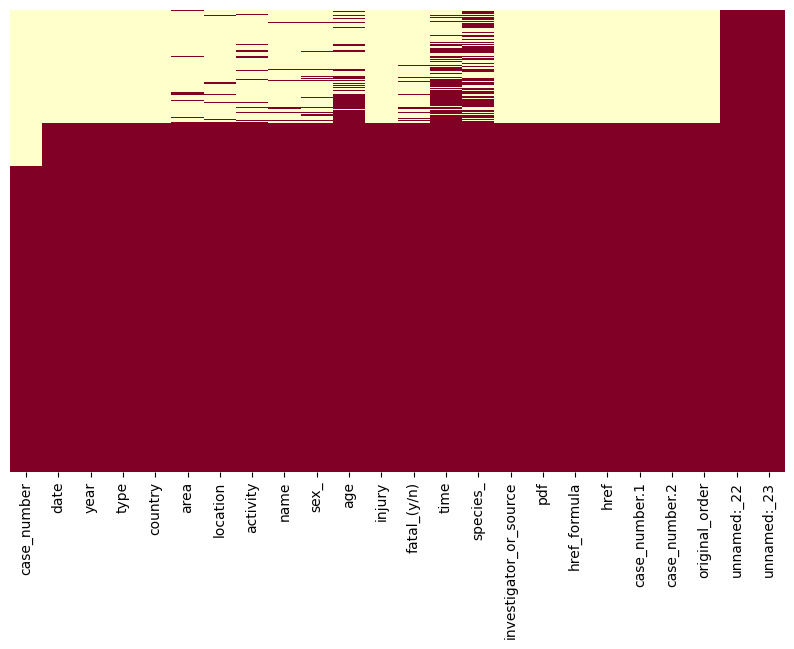

In [13]:
check_nan(ataques)

In [14]:
ataques.duplicated().any()

True

In [15]:
#identifico cuáles son esas filas duplicadas
duplicados=ataques.duplicated()
filas_duplicadas=ataques[duplicados]
filas_duplicadas

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6314,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ataques = ataques.drop(filas_duplicadas.index)
ataques

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
ataques_original.shape, ataques.shape

((25723, 24), (6312, 24))

'N nan cols: 24'

case_number                0.031686
date                       0.158428
year                       0.190114
type                       0.221800
country                    0.950570
area                       7.366920
location                   8.713561
activity                   8.776933
name                       3.485425
sex_                       9.109632
age                       45.009506
injury                     0.602028
fatal_(y/n)                8.697719
time                      53.295311
species_                  45.120406
investigator_or_source     0.427757
pdf                        0.158428
href_formula               0.174271
href                       0.158428
case_number.1              0.158428
case_number.2              0.158428
original_order             0.047529
unnamed:_22               99.984157
unnamed:_23               99.968314
dtype: float64

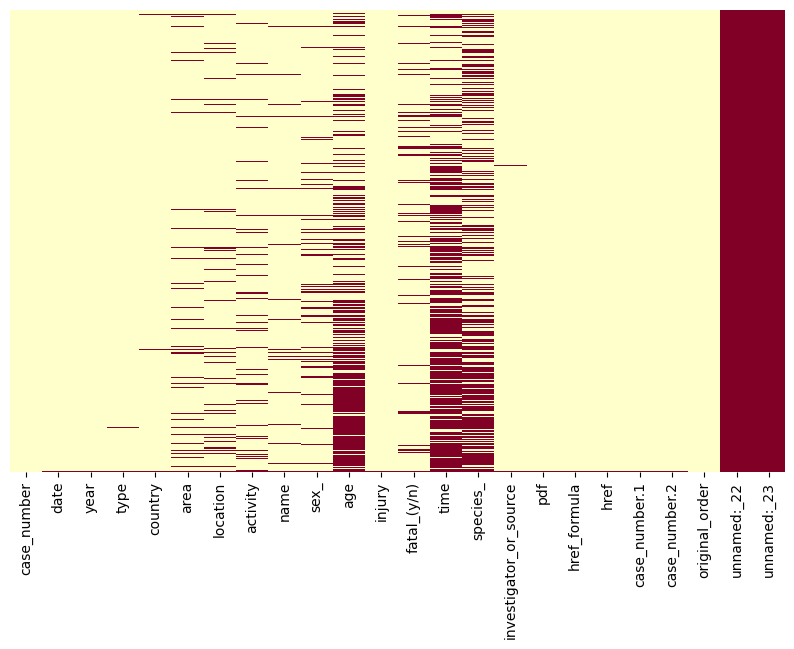

In [18]:
check_nan(ataques)

In [19]:
#filtro las filas con valores nulos
filas_null=ataques.isna().all(axis=1)
filas_null=ataques[filas_null]

In [20]:
cantidad_filas_nulls=filas_null.sum()
cantidad_filas_nulls

case_number                 0
date                        0
year                      0.0
type                        0
country                     0
area                        0
location                    0
activity                    0
name                        0
sex_                        0
age                         0
injury                      0
fatal_(y/n)                 0
time                        0
species_                    0
investigator_or_source      0
pdf                         0
href_formula                0
href                        0
case_number.1               0
case_number.2               0
original_order            0.0
unnamed:_22                 0
unnamed:_23                 0
dtype: object

In [21]:
ataques[filas_null].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             0 non-null      object 
 1   date                    0 non-null      object 
 2   year                    0 non-null      float64
 3   type                    0 non-null      object 
 4   country                 0 non-null      object 
 5   area                    0 non-null      object 
 6   location                0 non-null      object 
 7   activity                0 non-null      object 
 8   name                    0 non-null      object 
 9   sex_                    0 non-null      object 
 10  age                     0 non-null      object 
 11  injury                  0 non-null      object 
 12  fatal_(y/n)             0 non-null      object 
 13  time                    0 non-null      object 
 14  species_                0 non-null     

In [22]:
ataques = ataques.drop(filas_null.index)
ataques

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
ataques_original.shape, ataques.shape

((25723, 24), (6311, 24))

'N nan cols: 24'

case_number                0.015845
date                       0.142608
year                       0.174299
type                       0.205990
country                    0.934876
area                       7.352242
location                   8.699097
activity                   8.762478
name                       3.470132
sex_                       9.095231
age                       45.000792
injury                     0.586278
fatal_(y/n)                8.683251
time                      53.287910
species_                  45.111710
investigator_or_source     0.411979
pdf                        0.142608
href_formula               0.158453
href                       0.142608
case_number.1              0.142608
case_number.2              0.142608
original_order             0.031691
unnamed:_22               99.984155
unnamed:_23               99.968309
dtype: float64

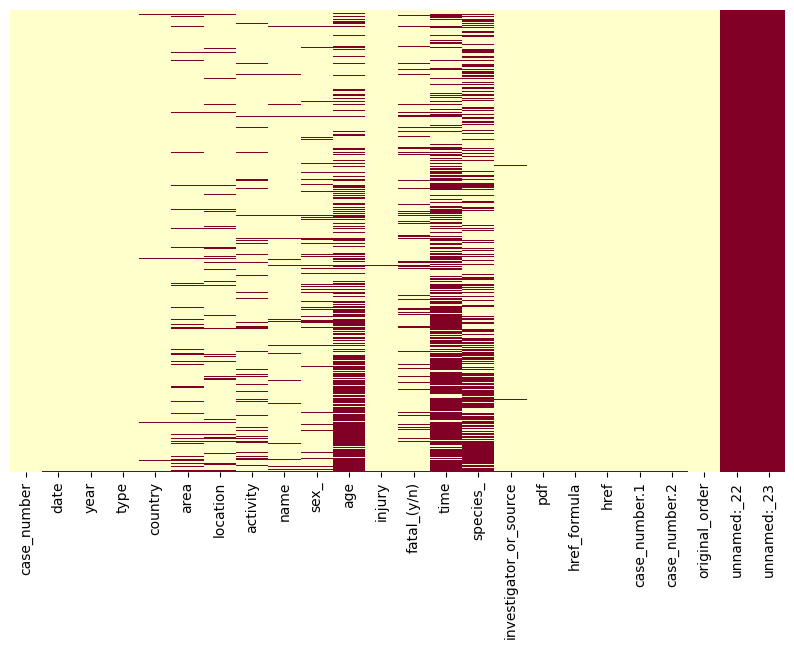

In [24]:
check_nan(ataques)

-Algunas columnas, como 'age', 'time', 'species_', y 'unnamed:_22', tienen un porcentaje más bajo de valores no nulos. Esto podría indicar que estas columnas tienen una cantidad considerable de valores nulos y deberías considerar cómo abordarlos

-Las columnas 'age' y 'time' tienen un porcentaje relativamente bajo de valores no nulos.

-La columna 'unnamed:_22' tiene un porcentaje extremadamente bajo de valores no nulos (99.988510).

## Columna 'case_number'

In [25]:
ataques['case_number'].isnull().sum() 

1

In [26]:
ataques['case_number'].fillna('desconocido', inplace=True)

'N nan cols: 23'

date                       0.142608
year                       0.174299
type                       0.205990
country                    0.934876
area                       7.352242
location                   8.699097
activity                   8.762478
name                       3.470132
sex_                       9.095231
age                       45.000792
injury                     0.586278
fatal_(y/n)                8.683251
time                      53.287910
species_                  45.111710
investigator_or_source     0.411979
pdf                        0.142608
href_formula               0.158453
href                       0.142608
case_number.1              0.142608
case_number.2              0.142608
original_order             0.031691
unnamed:_22               99.984155
unnamed:_23               99.968309
dtype: float64

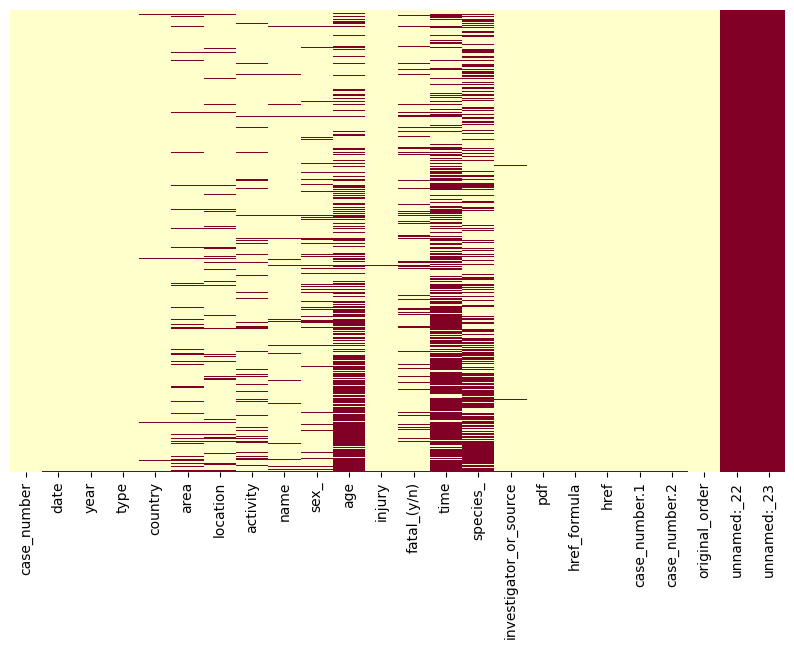

In [27]:
check_nan(ataques)

## Columna 'date'

In [28]:
ataques['date'].isnull().sum()

9

In [29]:
ataques['date'].fillna('desconocido', inplace=True)

'N nan cols: 22'

year                       0.174299
type                       0.205990
country                    0.934876
area                       7.352242
location                   8.699097
activity                   8.762478
name                       3.470132
sex_                       9.095231
age                       45.000792
injury                     0.586278
fatal_(y/n)                8.683251
time                      53.287910
species_                  45.111710
investigator_or_source     0.411979
pdf                        0.142608
href_formula               0.158453
href                       0.142608
case_number.1              0.142608
case_number.2              0.142608
original_order             0.031691
unnamed:_22               99.984155
unnamed:_23               99.968309
dtype: float64

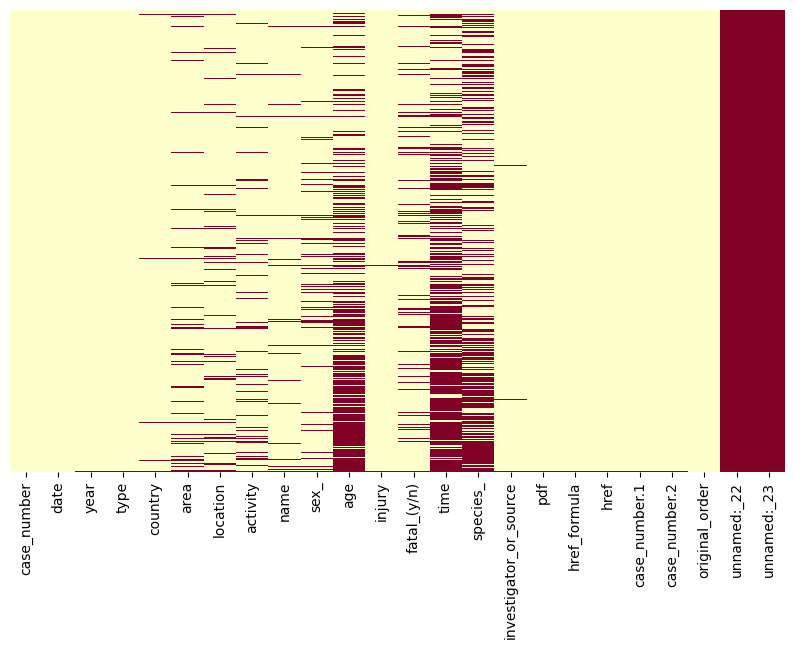

In [30]:
check_nan(ataques)

## Columna 'year'

In [32]:
ataques['year'].isnull().sum()

11

In [33]:
ataques['year'].fillna('desconocido', inplace=True)

'N nan cols: 21'

type                       0.205990
country                    0.934876
area                       7.352242
location                   8.699097
activity                   8.762478
name                       3.470132
sex_                       9.095231
age                       45.000792
injury                     0.586278
fatal_(y/n)                8.683251
time                      53.287910
species_                  45.111710
investigator_or_source     0.411979
pdf                        0.142608
href_formula               0.158453
href                       0.142608
case_number.1              0.142608
case_number.2              0.142608
original_order             0.031691
unnamed:_22               99.984155
unnamed:_23               99.968309
dtype: float64

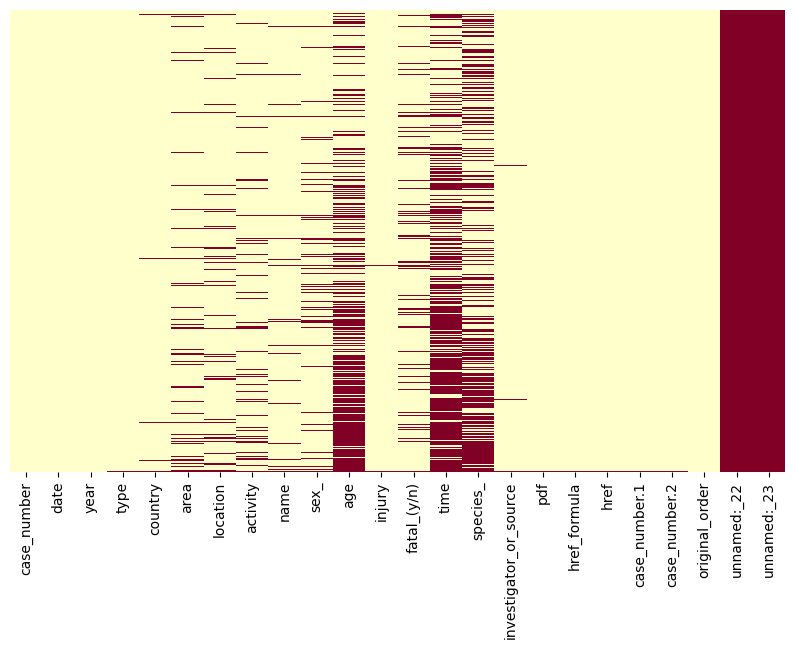

In [35]:
check_nan(ataques)

## Columna 'type'

¡Sí me interesa para mi objetivo!

In [36]:
ataques['type'].isnull().sum()

13

In [37]:
ataques['type'].fillna('desconocido', inplace=True)

'N nan cols: 20'

country                    0.934876
area                       7.352242
location                   8.699097
activity                   8.762478
name                       3.470132
sex_                       9.095231
age                       45.000792
injury                     0.586278
fatal_(y/n)                8.683251
time                      53.287910
species_                  45.111710
investigator_or_source     0.411979
pdf                        0.142608
href_formula               0.158453
href                       0.142608
case_number.1              0.142608
case_number.2              0.142608
original_order             0.031691
unnamed:_22               99.984155
unnamed:_23               99.968309
dtype: float64

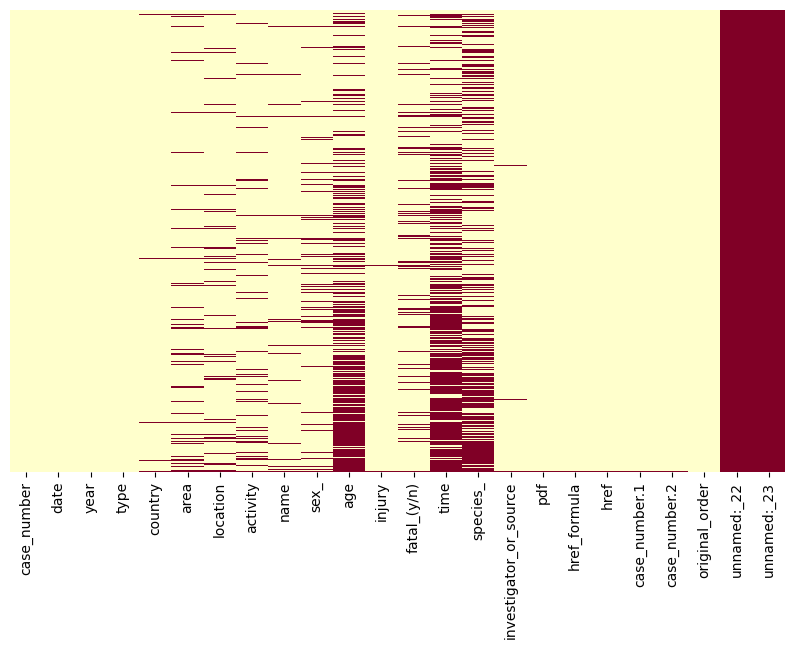

In [38]:
check_nan(ataques)

In [31]:
#Indices: 'case_number', 'date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time', 'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22', 'unnamed:_23'
#Objetivo: Ubicaciones más peligrosas: ¿En qué países o áreas se producen más ataques de tiburones? ¿Qué actividades son más riesgosas en ciertas ubicaciones?
#columnas que necesito: 'type';'country';'area';'activity'; 'fatal_(y/n)' ; 'species_'